# Data Mining Process on Gun Violence Data - Report 1

## Authors:
* Aleksandra Jażdżewska 193601
* Michał Jakielaszek 193300
* Szymon Kasprzycki 193065

<br>
<br>

# General Description of the Dataset
The dataset is a comprehensive record of over 260,000 gun violence incidents in the United States, spanning from January 2013 to March 2018. Each entry in the CSV file represents a unique incident, providing detailed information that may include:
* Date and time of the incident
* Location (city, state, latitude, and longitude)
* Number of casualties (injured and fatalities)
* Type of gun(s) used
* Circumstances and context of the incident (e.g., domestic violence, gang-related, accidental)
* Demographic details of the individuals involved (age, gender, etc.)
* Legal status of the gun (e.g., registered, stolen)

# Data mining goals 
* **Pattern Identification**
    * Objective: Determinine hotspots of gun violence by analyzing geographic distribution. 
    * Outcome: Understand which areas are most affected. 
* **Predictive Modeling:**    
    * Objective: Develop models to predict future gun violence incidents based on historical data. 
    * Outcome: Identify key predictors that contribute to higher risks of incidents.     
* **Demographic Analysis:**
    * Objective: Analyze demographic factors
    * Outcome: Create profile of victims and perpetrators (race, gender, age socioeconomic)
* **Policy Impact Assessment:**
    * Objective: Assess the impact of local, state, and federal policies on gun violence trends
    * Outcome: Evaluated effectiveness of various legislative measures.

# Success criteria

* **Accuracy and Robustness of Predictive Models**:
    * Models should accurately predict future incidents with high precision and recall. 
* **Usability and Accessibility**:
    * The results should be presented in a user-friendly format
* **Detailed Profile**:
    * Deatiled profiles of victim and perpetrator should be made 

# Characteristics of the data set
* **Origin**:
The dataset originates from the Gun Violence Archive (GVA), a non-profit organization that collects and verifies information about gun-related violence in the United States.
The data was obtained through web scraping techniques due to limitations in the GVA's query results and export functionalities.
* **Format**:
The dataset is available in CSV format. Each row in the file represents a unique gun violence incident.
* **Number of Samples**:
Over 260k
* **Structure**:
The dataset is consolidated into a single CSV file, although it was initially compiled from multiple CSV files (one per month) which were later merged. Each entry contains detailed information about the incident

# Description of the attributes
names, types - nominal / numerical, meaning, unit of measurement, special values


* incident_id - unique identifier of each indident (numerical)
* date - Date of crime (date, day)
* state - State of crime (nominal)
* city_or_county - City/ County of crime (nominal)
* address - Address of the location of the crime (nominal)
* n_killed - Number of people killed (numerical)
* n_injured - Number of people injured (numerical)
* incident_url - URL regarding the incident (nominal)
* source_url - Reference to the reporting source (nominal)
* incident_url_fields_missing - TRUE if the incident_url is present, FALSE otherwise (nominal)
* congressional_district - Congressional district id (numerical)
* gun_stolen - Status of guns involved in the crime (nominal)
* gun_type - Typification of guns used in the crime (nominal)
* incident_characteristics - Characteristics of the incidence (nominal, multiple values)
* latitude - Location of the incident (numerical)
* location_description - Description of location where the accient happend such as clubs, restaurants etc. (nominal)
* longitude - Location of the incident (numerical)
* n_guns_involved - Number of guns involved in incident (numerical)
* notes - Additional information of the crime (nominal, whole sentences)
* participant_age - Age of participant(s) at the time of crime (numerical,intervals)
* participant_age_group - Age group of participant(s) at the time crime (numerical, nominal)
* participant_gender - Gender of participant(s) (numerical, nominal, multiple values)
* participant_name - Name of participant(s) involved in crime (numerical, nominal, multiple values)
* participant_relationship - Relationship of participant to other participant(s) (numerical, nominal)
* participant_status - Extent of harm done to the participant (numerical, nominal, multiple values)
* participant_type - Type of participant e.g. victim, subject-suspect (numerical, nominal, multiple values)
* sources - Participants source (nominal)
* state_house_district - Voting house district (numerical)
* state_senate_district - Territorial district from which a senator to a state legislature is elected (numerical)

In [1]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os
import warnings

warnings.filterwarnings('ignore')

print("Available data files:")
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Available data files:
/kaggle/input/gun-violence-data/gun-violence-data_01-2013_03-2018.csv


In [2]:
df = pd.read_csv('/kaggle/input/gun-violence-data/gun-violence-data_01-2013_03-2018.csv')

# Data exploratory analysis

In this section the data exploratory analysis will be performed. It should result in some conclusions about the correlation of specific attributes, their distribution and some general findings about the content of the dataset.

However, before trying to get any meaningful conclusions from the dataset, it is needed to perform some data preprocessing & cleaning.

First, we have to drop columns that we're not interested in, and drop the rows that contain missing values.


In [3]:
interest_columns = ['date', 'state', 'city_or_county', 'n_killed', 'n_injured', 'congressional_district', 'incident_characteristics', 'latitude', 'longitude', 'n_guns_involved', 'participant_age_group','participant_gender','participant_status','participant_type', 'state_house_district','state_senate_district']
processed_df = df.copy()[interest_columns]

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
# Split date into year, month and day of month
processed_df['date'] = pd.to_datetime(processed_df['date'], format='%Y-%m-%d')
processed_df['day'] = processed_df['date'].dt.day
processed_df['month'] = processed_df['date'].dt.month_name()
processed_df['month'] = pd.Categorical(processed_df['month'], categories=month_order, ordered=True)
processed_df['year'] = processed_df['date'].dt.year
processed_df['year'] = pd.Categorical(processed_df['year'], ordered=True)
processed_df['quarter'] = processed_df['date'].dt.quarter
processed_df['weekday'] = processed_df['date'].dt.weekday
processed_df['loss'] = processed_df['n_killed'] + df['n_injured']

processed_df = processed_df.drop("date", axis=1)

The second part of preprocessing consists of data conversion to wide format. There are several columns that consists of multiple (aggregated) values that could be processed to be more representative in case of this analysis.

<br>
<br>

Those columns are: `participant_type, patricipant_age_group, participant_gender and incident_characteristics`.

`participant_type` column is converted into two following columns:


* n_victim -> number of victims of the incident
* n_suspects -> number of suspects taking part in the incident



`participant_age_group` column is converted into three following columns:


* n_adults -> number of adults being participants of the accident
* n_teens -> number of adults being participants of the accident
* n_children -> number of children being participants of the accident



`participant_gender` column is converted into two following columns:


* n_male -> number of males being participants of the accident
* n_female -> number of females being participants of the accident

<br>
<br>

Additionaly the `incident_characteristics` column is transformed into over 100 columns indicating specific characteristics of each incident with categorical values (1 - true, 0 - false).

At the end, the processedcolumns are deleted from the dataframe.

In [4]:
def split_participant_column(df, column_name, category_mapping):
    category_counts = {new_col: [] for new_col in category_mapping.values()}

    for entry in df[column_name].fillna(''):
        counts = {key: 0 for key in category_mapping.values()}
        
        for item in entry.split('||'):
            if '::' in item:
                idx, category = item.split('::')
                if category in category_mapping:
                    counts[category_mapping[category]] += 1
        
        for key in counts:
            category_counts[key].append(counts[key])
    
    counts_df = pd.DataFrame(category_counts)
    df = pd.concat([df, counts_df], axis=1)
    
    return df

# Define category mappings for each participant column
type_mapping = {
    'Victim': 'n_victim',
    'Subject-Suspect': 'n_suspect'
}

age_group_mapping = {
    'Adult 18+': 'n_adults',
    'Teen 12-17': 'n_teens',
    'Child 0-11': 'n_children'
}

gender_mapping = {
    'Male': 'n_males',
    'Female': 'n_females'
}

# Split each participant column
processed_df = split_participant_column(processed_df, 'participant_type', type_mapping)
processed_df = split_participant_column(processed_df, 'participant_age_group', age_group_mapping)
processed_df = split_participant_column(processed_df, 'participant_gender', gender_mapping)



# Separate incident characteristics into columns
def normalize_characteristic(c: str) -> str:
    return f"flag_{c.strip().replace(' ', '_').replace('-', '_').replace('(', '').replace(')', '').replace(',', '').replace('/', '_').lower()}"

incident_characteristics = processed_df['incident_characteristics'].fillna('')

all_characteristics = set()
for characteristics in incident_characteristics:
    for characteristic in characteristics.split('||'):
        if '|' in characteristics.strip():
            for entry in characteristic.strip().split('|'):
                all_characteristics.add(normalize_characteristic(entry))
        else:
            all_characteristics.add(normalize_characteristic(characteristic))

            
binary_columns_list = []

for index, characteristics in incident_characteristics.items():
    binary_columns = {char: 0 for char in all_characteristics if len(char) != 0}
    for characteristic in characteristics.split('||'):
        cols = []
        if '|' in characteristics.strip():
            for entry in characteristic.strip().split('|'):
                cols.append(normalize_characteristic(entry))
        else:
            cols.append(normalize_characteristic(characteristic))
        for col_name in cols:
            if col_name in binary_columns:
                binary_columns[col_name] = 1

    binary_columns_list.append(binary_columns)


characteristics_df = pd.DataFrame(binary_columns_list)
processed_df = pd.concat([processed_df, characteristics_df], axis=1)


# Drop all processed columns
processed_df.drop(columns=['incident_characteristics', 'participant_type', 'participant_age_group', 'participant_status', 'participant_gender'], inplace=True)

## Distribution of numerical attributes values

The distribution of the numerical attributes values is shown in the following way on each plot:


* automatically generated **bins** for the data
* **KDE (Kernel Density Estimate)** - estimate of the probability density function (PDF) of a variable in a non-parametric way

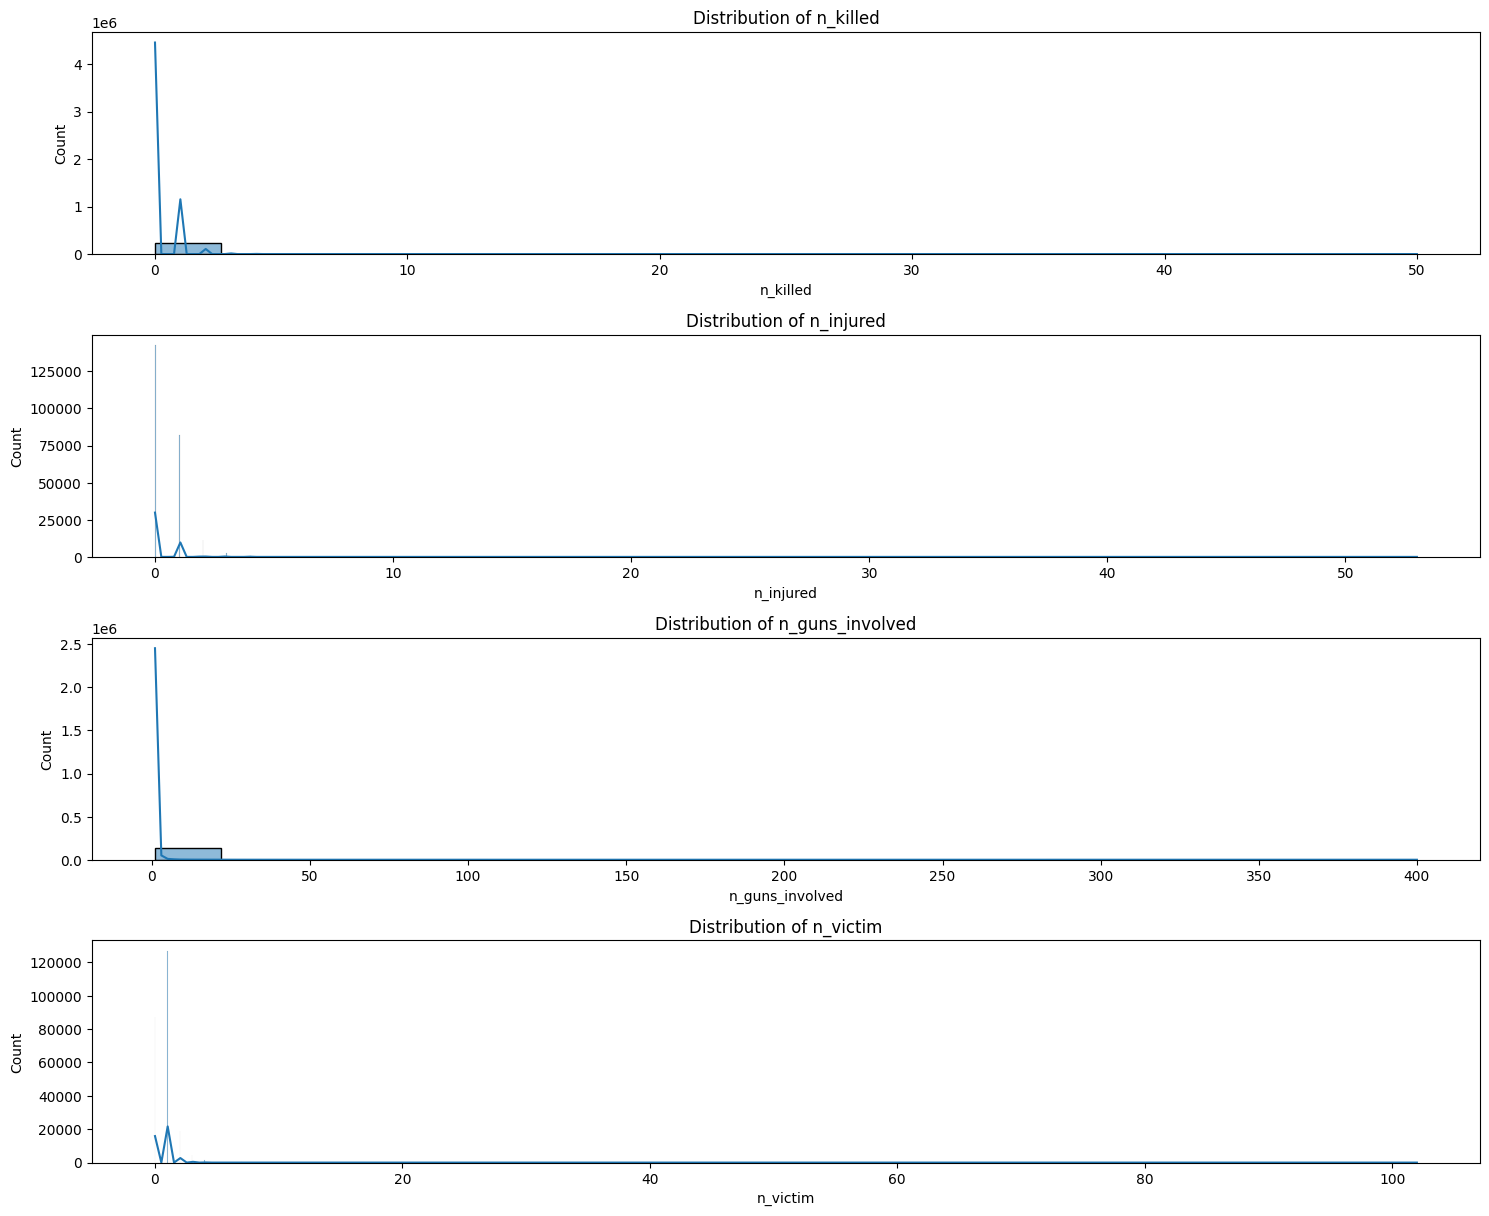

In [5]:
selected_columns = ['n_killed', 'n_injured', 'n_guns_involved', 'n_victim', 'n_suspect', 'n_adults', 'n_teens', 'n_children', 'n_males', 'n_females']
distribution_df = processed_df[selected_columns]
num_cols = distribution_df.shape[1]

plt.figure(figsize=(15, 30))

for i, col in enumerate(distribution_df.columns[:4]):
    plt.subplot(num_cols, 1, i + 1)
    sns.histplot(distribution_df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

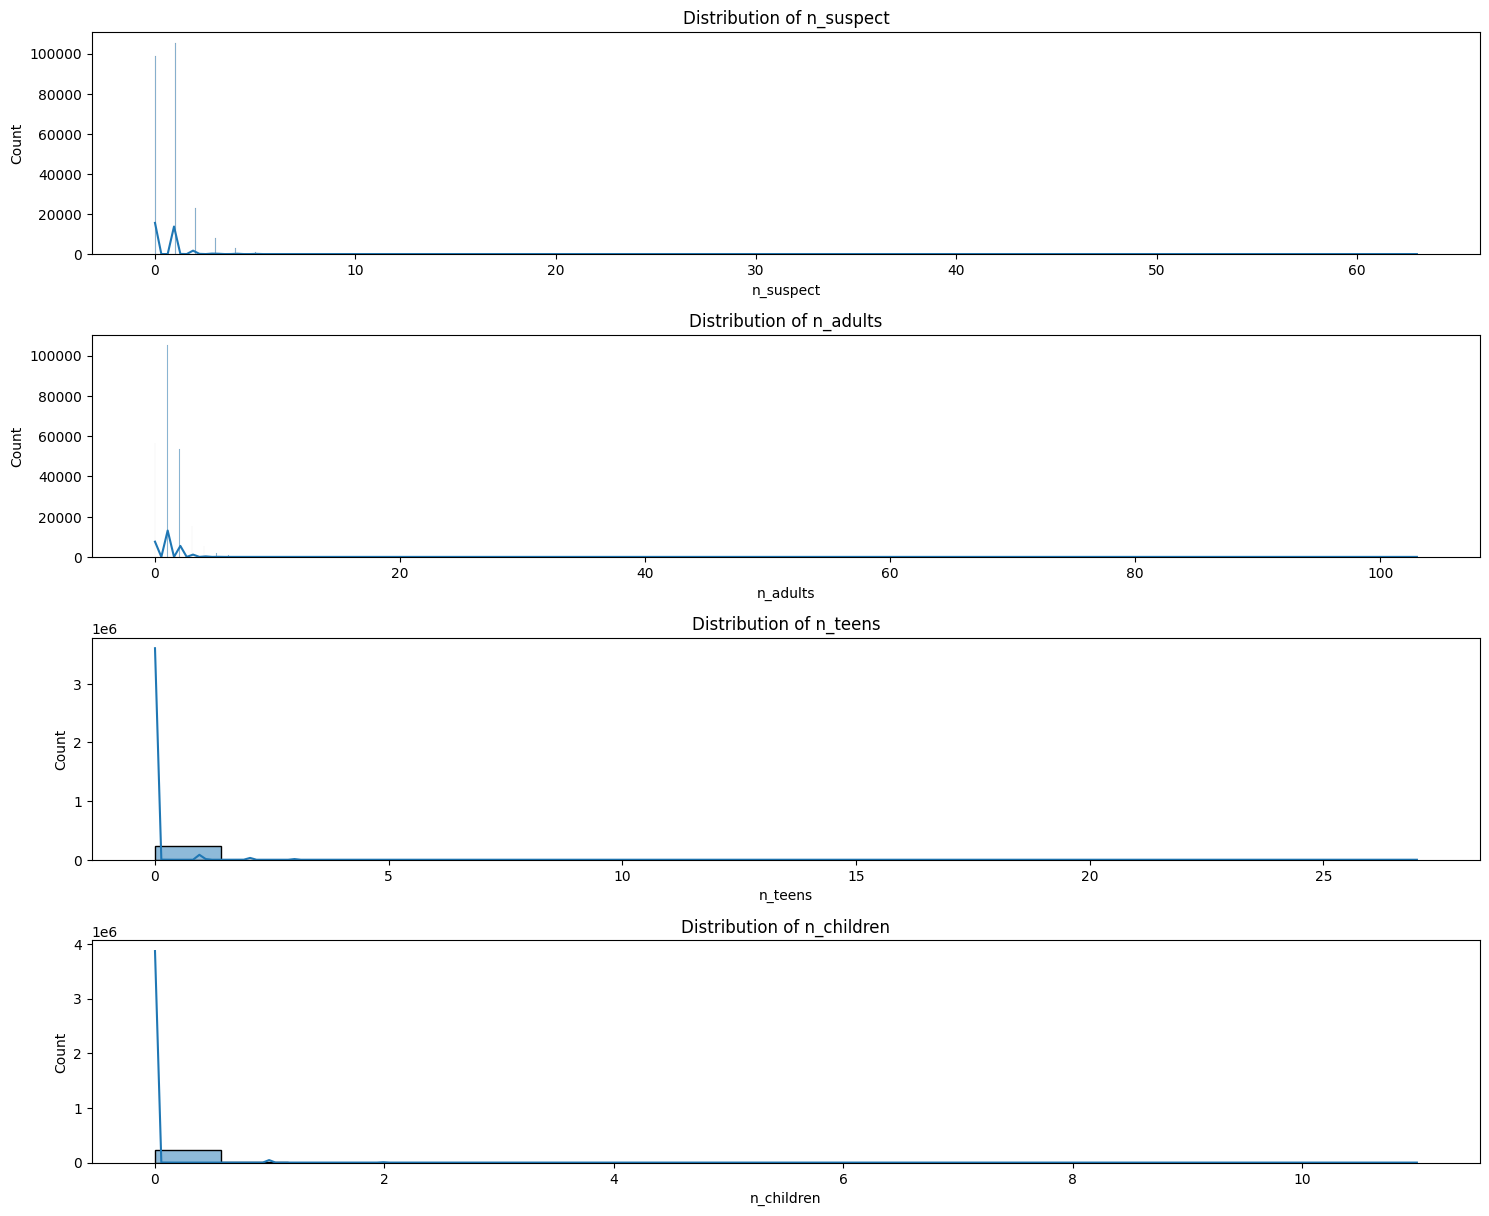

In [6]:
plt.figure(figsize=(15, 30))

for i, col in enumerate(distribution_df.columns[4:8]):
    plt.subplot(num_cols, 1, i + 1)
    sns.histplot(distribution_df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

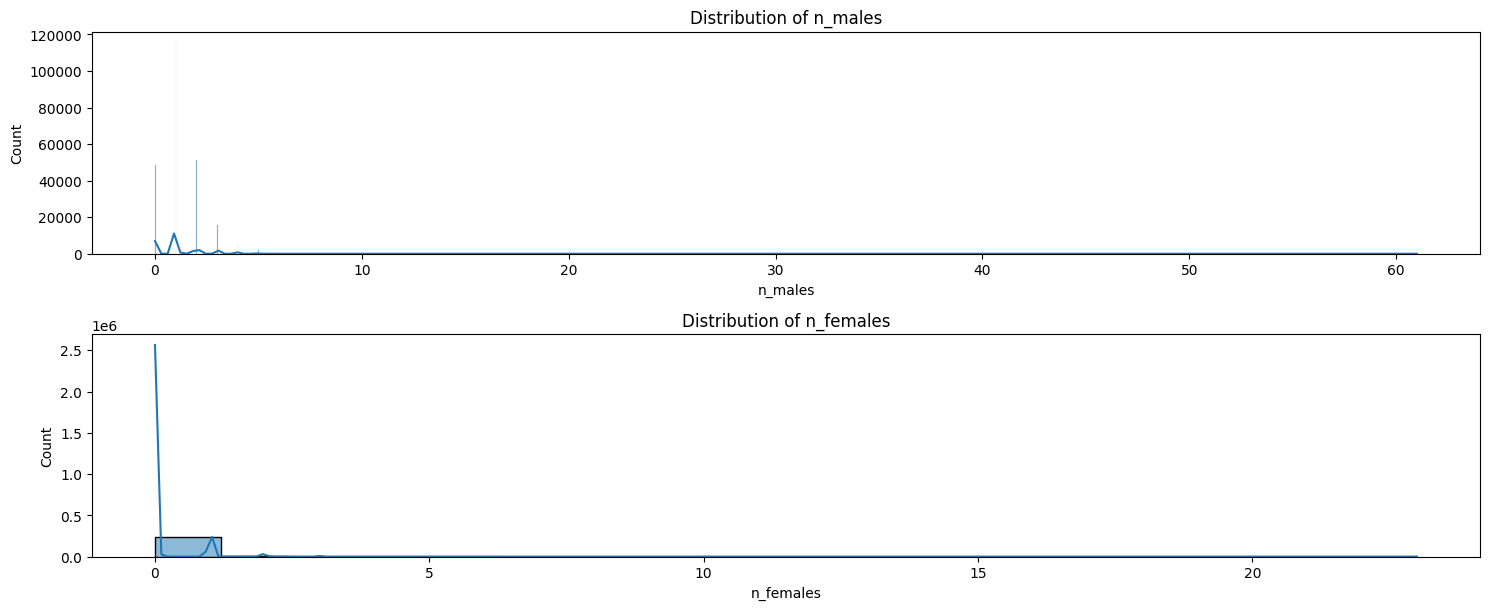

In [7]:
plt.figure(figsize=(15, 30))

for i, col in enumerate(distribution_df.columns[8:]):
    plt.subplot(num_cols, 1, i + 1)
    sns.histplot(distribution_df[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

It is visible that most of the values lies in the low range, near 0.

However, for the distribution for number of people involved by genders - it is clearly visible that in the significant part of the cases females did not take part in the accident.

Also one thing looks interesting, the distributions of `n_suspect` and `n_victims` are very similar, aren't they? We can say the same for distributions of `n_killed` and `n_injured`.
<br>
<br>
<br>

It also seems promising to cut out the most frequent values from the data to check the adjusted distribution.

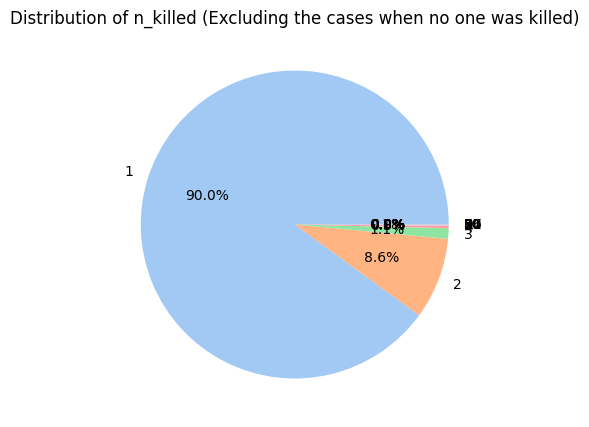

In [8]:
n_killed_filtered_df = processed_df.copy()[processed_df['n_killed'] > 0]
n_killed_counts = n_killed_filtered_df['n_killed'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(n_killed_counts, labels=n_killed_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel', len(n_killed_counts)))
plt.title('Distribution of n_killed (Excluding the cases when no one was killed)')
plt.show()

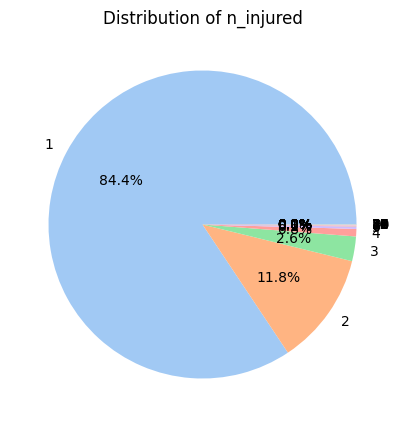

In [9]:
n_injured_filtered_df = processed_df.copy()[processed_df['n_injured'] > 0]
n_injured_counts = n_injured_filtered_df['n_injured'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(n_injured_counts, labels=n_injured_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel', len(n_injured_counts)))
plt.title('Distribution of n_injured')
plt.show()

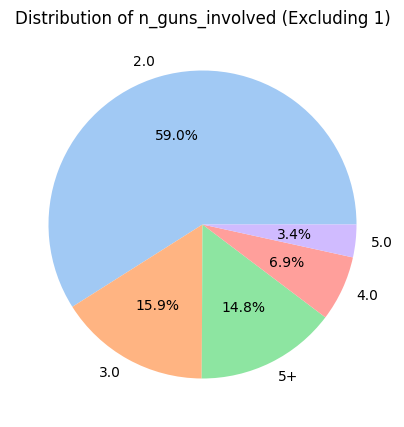

In [10]:
n_guns_filtered_df = processed_df.copy()[processed_df['n_guns_involved'] > 1]
n_guns_filtered_df['n_guns'] = n_guns_filtered_df['n_guns_involved'].copy().astype(str)
n_guns_filtered_df.loc[n_guns_filtered_df['n_guns_involved'] > 5, 'n_guns'] = '5+'
n_guns_involved_counts = n_guns_filtered_df['n_guns'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(n_guns_involved_counts, labels=n_guns_involved_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel', len(n_guns_involved_counts)))
plt.title('Distribution of n_guns_involved (Excluding 1)')
plt.show()

As it is presented on the pie charts above:


* when taking into consderation only incidents when at least one person was killed -> **exactly 90% of the cases ended up with one death**
* when taking into consderation only incidents when at least one person was injured -> **more than 84% of the cases ended up with one injury**
* when taking into consideration only incident when at least one gun was used -> two guns were used in more than the half of the cases, but more surprisingly **nearly 15% of the remaining cases were recorded with usage of more than 5 guns**

## Distribution of categorical attributes values

In this section, the several plots are prepared that initially visualize our data in the context of its categorical columns. By that the data can better understood, and some interesting findings may appear.

First look goes to the distribution of `city_or_conty, state, month, year, state_house_district, state_senate_district` attributes:

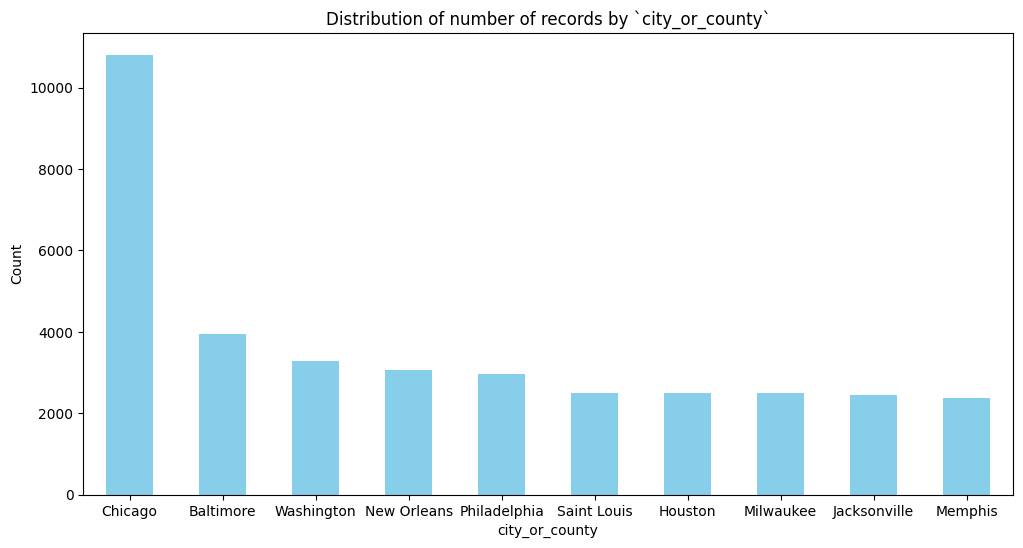

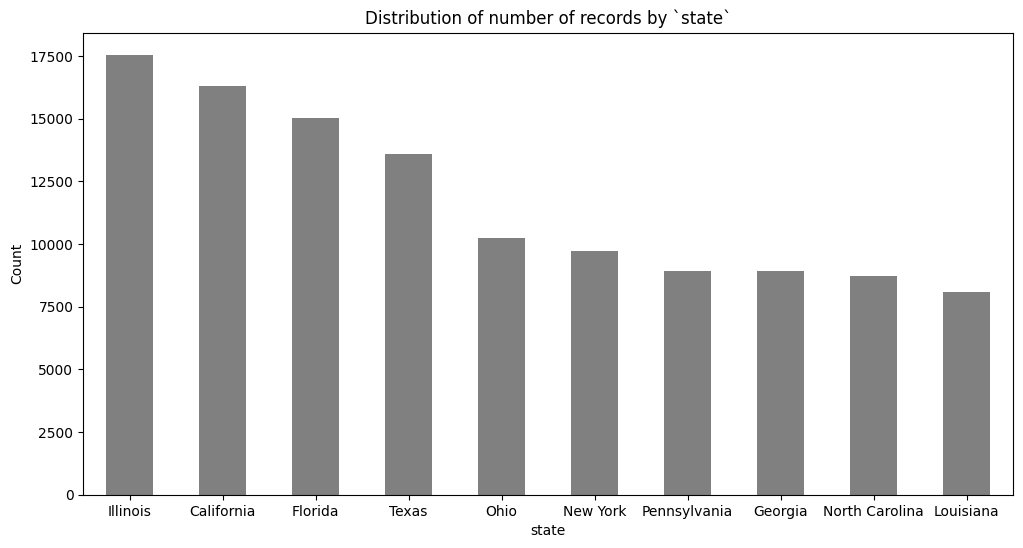

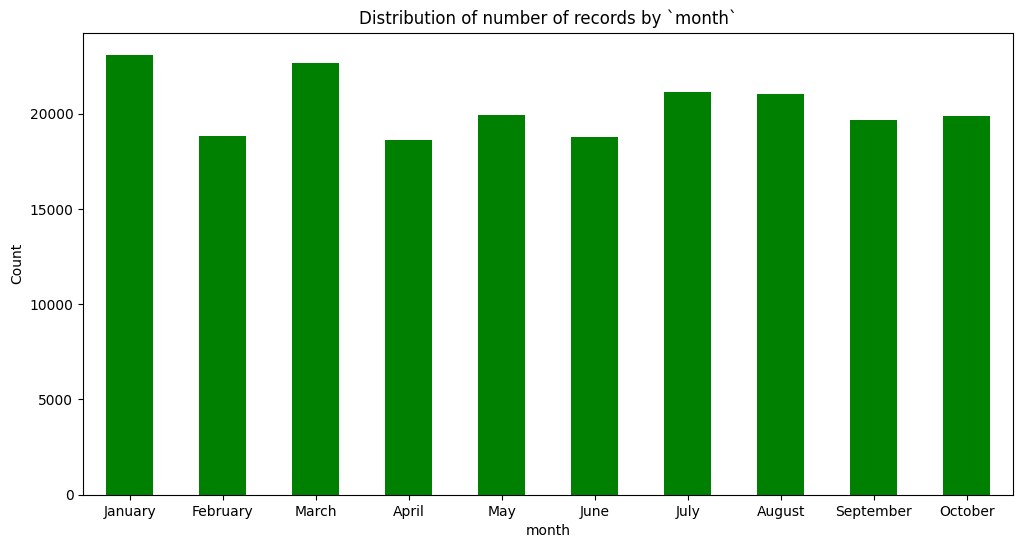

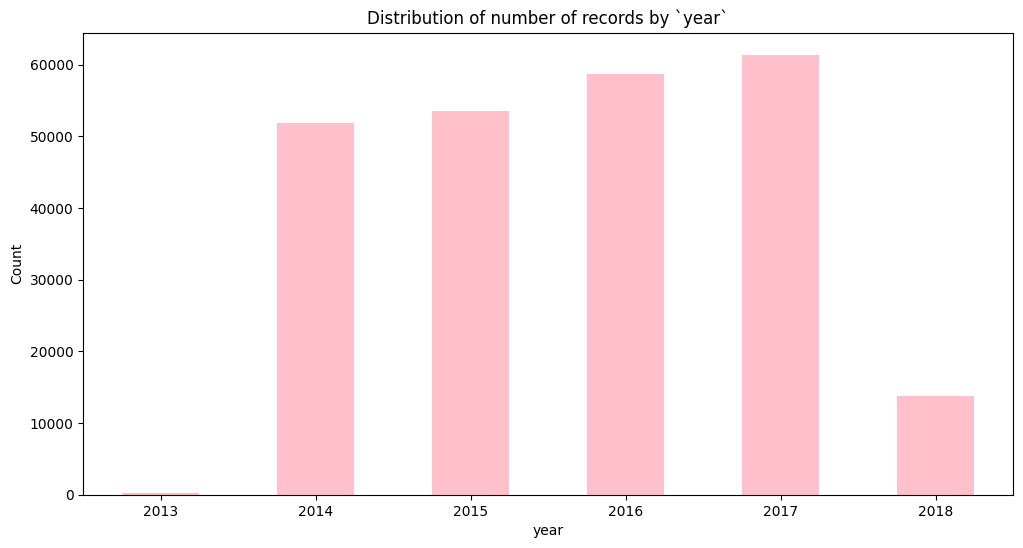

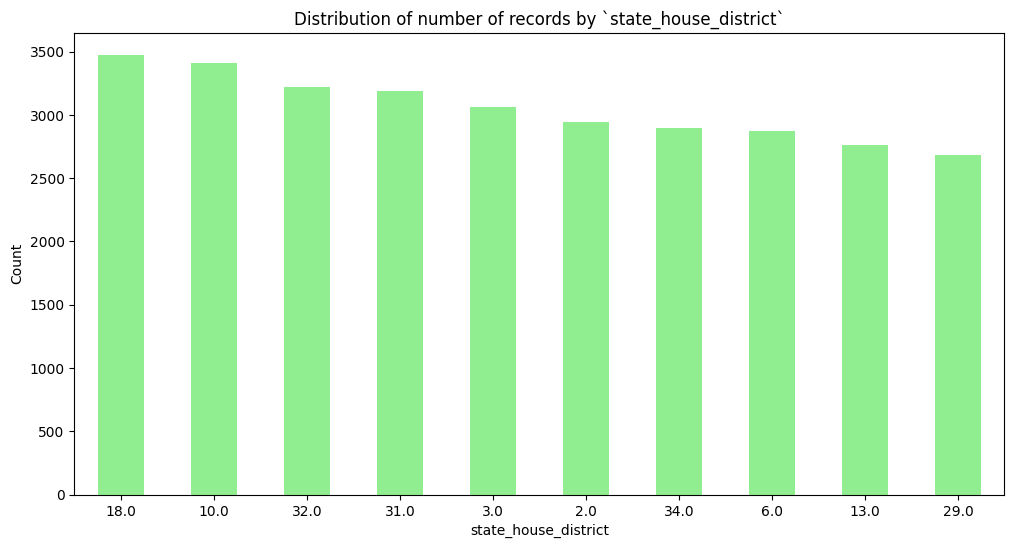

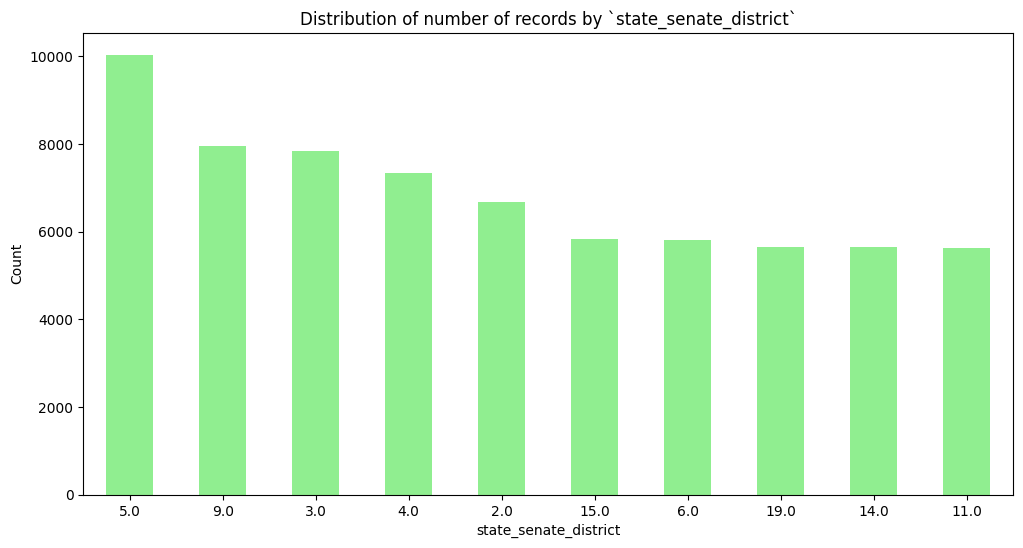

In [11]:
cat_attrs = ('city_or_county', 'state', 'month', 'year', 'state_house_district', 'state_senate_district')
colors = ('skyblue', 'lightgreen', 'green', 'pink', 'yellow', 'gray')

for attribute in cat_attrs:
    plt.figure(figsize=(12, 6))
    if attribute in ("month", "year"):
        processed_df[attribute].value_counts().sort_index().head(10).plot(kind='bar', color=np.random.choice(colors))
    else:
        processed_df[attribute].value_counts().head(10).plot(kind='bar', color=np.random.choice(colors))
    plt.title(f'Distribution of number of records by `{attribute}`')
    plt.xlabel(attribute)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

On the charts above, it can be seen that the most of incidents occured in Chicago (if we wanted to name **the most dangerous city**). Therefore, it is not the surprise that Illnois state is the most dangerous one in the case of incidents number, because Chicago is the city of Illnois.

When interpreting the number of occurences in the context of time - months especially, it can be seen that the most incident occur in January and March. But they are not extremely high, the distribution looks similarly to the uniform distribution. There are no extreme cases. Next, when interpreting the number of incidents in the context of years, the trend can be seen. Over the years, number of incidents tends to increase and the trend looks pretty constant (edge years - 2013 and 2018 - are not taken into consideration as they are not full).
<br>
<br>

### Incident characteristics

It is also worth noticing that in the dataset, each event has its down characteristics defined in the column `incident_characteristics`. Thanks to the preprocessing of the data, in our **proceessed_df** we have them splitted into separate columns (the wide format of the data) so that we can look for some interesting findings about them.

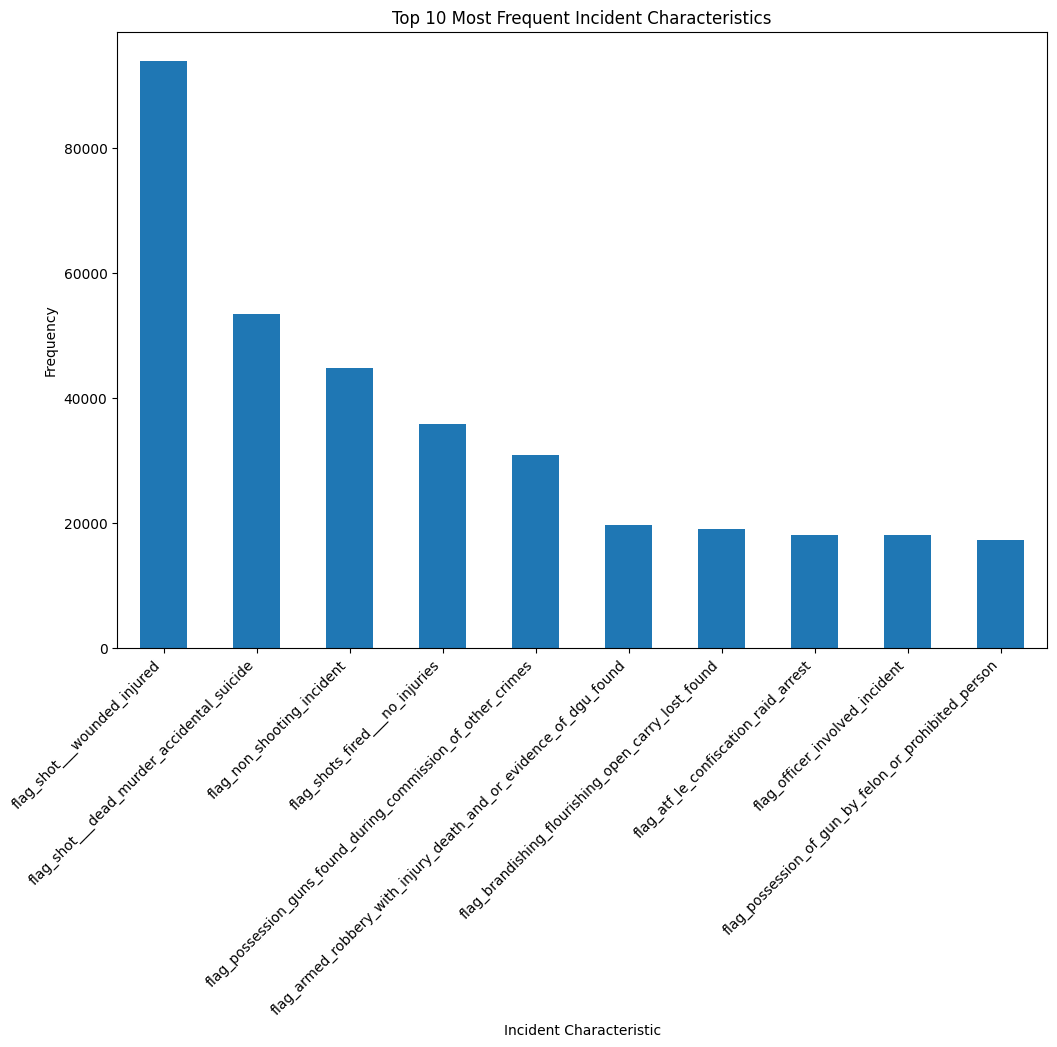

In [12]:
flag_columns = [x for x in processed_df.columns if x.startswith("flag_")]
characteristics_freq = processed_df[flag_columns].sum().sort_values(ascending=False)

top_10_characteristics = characteristics_freq.head(10)

plt.figure(figsize=(12, 8))
top_10_characteristics.plot(kind='bar')
plt.title('Top 10 Most Frequent Incident Characteristics')
plt.xlabel('Incident Characteristic')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

## Correlations between incident attributes' values

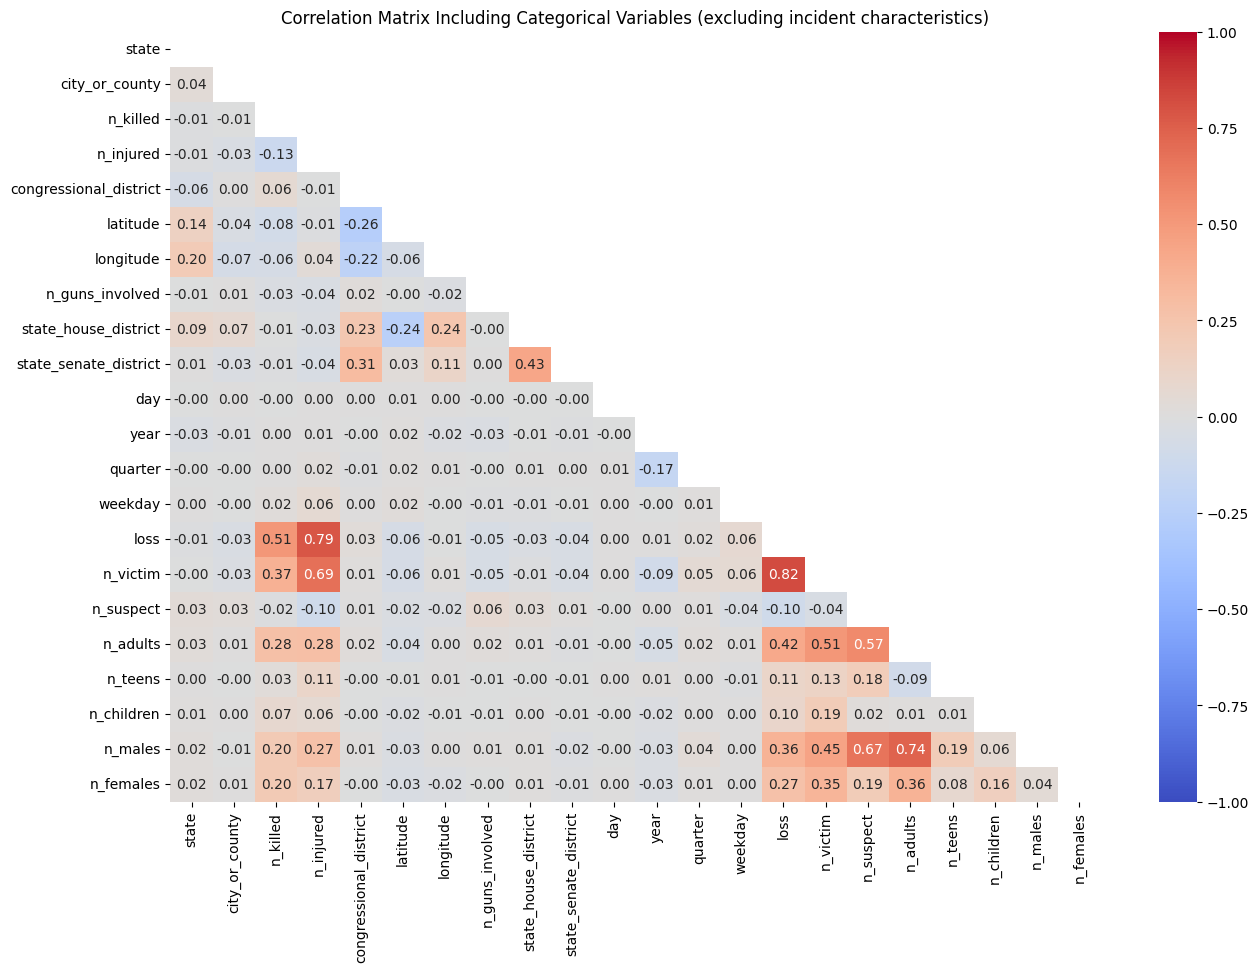

In [13]:
from sklearn.preprocessing import LabelEncoder

corr_df = processed_df.copy()
corr_df = corr_df.drop([*[x for x in corr_df.columns if x.startswith("flag_")], 'month'], axis=1)
categorical_cols = corr_df.select_dtypes(include=['object']).columns

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    corr_df[col] = le.fit_transform(corr_df[col].astype(str))
    label_encoders[col] = le
    
correlation_matrix = corr_df.corr()

plt.figure(figsize=(15, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Including Categorical Variables (excluding incident characteristics)')
plt.show()

On the correlation matrix several correlated things can be seen.

At first, it is important to note that the most of them are correlated in the logical way. Example of such correlation is `n_injured` and `loss`, because the loss is calculated on the base of `n_injured` and `n_killed`.

However, there are few interesting findings from the correlations matrix:


* the `n_adults` and `n_males` correlation coefficient is pretty high (0.74) which may suggest that most of the adults are males or most of the males are adults
* the `n_suspect` and `n_males` correlation coefficient is pretty high (0.67) which may suggest that there is some connection between the male gender and being suspect

## Linear regression for the top 5 most correlated attributes (including incident characteristics)

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


correlation_pairs = correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False)
top_5_pairs = correlation_pairs[correlation_pairs != 1.0][::2].head(5).index

for pair in top_5_pairs:
    attribute1, attribute2 = pair

    regression_data = corr_df[[attribute1, attribute2]]

    X = regression_data[[attribute1]]
    y = regression_data[attribute2]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    correlation = correlation_matrix.loc[attribute1, attribute2]
    
    print(f'Pair: {attribute1} - {attribute2}')
    print(f'Correlation coefficient: {correlation}')
    print(f'Mean Squared Error: {mse}')
    print('Coefficients:', model.coef_)
    print('Intercept:', model.intercept_)
    print('---------------------------------------------')
    

Pair: loss - n_victim
Correlation coefficient: 0.8240783404803679
Mean Squared Error: 0.2210205171053388
Coefficients: [0.82083549]
Intercept: 0.1784623149319141
---------------------------------------------
Pair: n_injured - loss
Correlation coefficient: 0.7888809272666891
Mean Squared Error: 0.2476048299317684
Coefficients: [0.91835465]
Intercept: 0.2932582501283878
---------------------------------------------
Pair: n_adults - n_males
Correlation coefficient: 0.7415042294059093
Mean Squared Error: 0.5223253663362339
Coefficients: [0.69137611]
Intercept: 0.4021061548831768
---------------------------------------------
Pair: n_injured - n_victim
Correlation coefficient: 0.6865859174816441
Mean Squared Error: 0.3569960840163128
Coefficients: [0.79818199]
Intercept: 0.3965057626804362
---------------------------------------------
Pair: n_males - n_suspect
Correlation coefficient: 0.665652142228533
Mean Squared Error: 0.5097023834908467
Coefficients: [0.59776873]
Intercept: 0.05790501797

## Correlations between specific incident characteristics

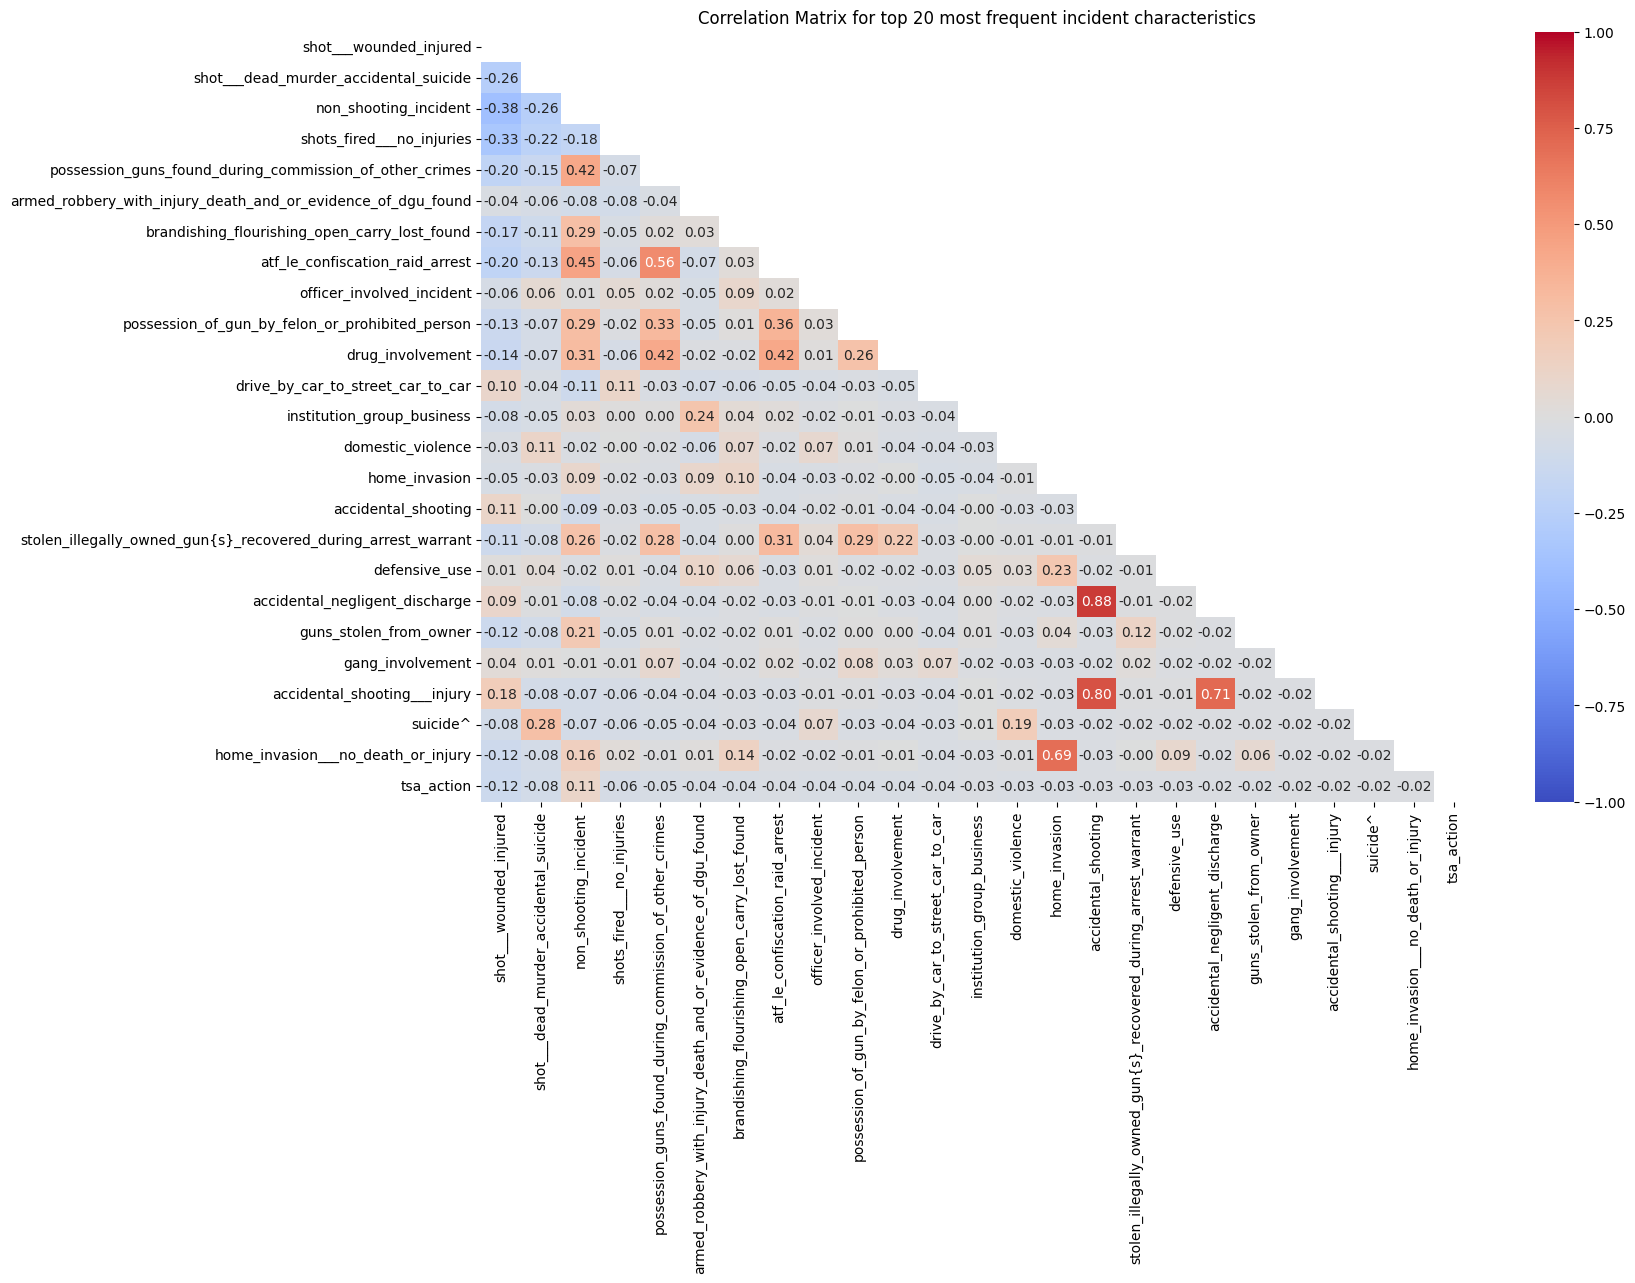

In [15]:
top_25_characteristics = characteristics_freq.head(25).index

data = processed_df.copy()[top_25_characteristics]
data.columns = data.columns.str.replace('^flag_', '', regex=True)

characteristics_correlation_matrix = data.corr()

plt.figure(figsize=(16, 10))
mask = np.triu(np.ones_like(characteristics_correlation_matrix, dtype=bool))
sns.heatmap(characteristics_correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for top 20 most frequent incident characteristics')
plt.show()

In the correlation matrix above, concerning most frequent incident characteristics can be seen that there are several strongly correlated pairs of characteristics.

According to the matrix:


* the most correlated characteristics are `accidental_shooting` and `accidental_negligent_discharge` (0.88 correlation coefficient)
* the second most correlated characteristics are `accidental_shooting` and `accidental_shooting_injury` (0.8 correlation coefficient)
* the third most correlated characteristics are `accidental_shooting_injury` and `accidental_negligent_discharge` (0.71 correlation coefficient)
* the fourth most correlated characterisics are `home_invasion` and `home_invasion_no_death_or_injury` (0.69 correlation coefficient)
* the fifth most correlated characteristics are `atf_le_confiscation_raid_arrest` and `possession_guns_found_during_commision_of_other_crimes` (0.56 correlation coefficient)

## Linear regression for the top 5 most correlated pairs of incident characteristics

In [16]:
correlation_pairs = characteristics_correlation_matrix.unstack().sort_values(kind="quicksort", ascending=False)

top_5_pairs = correlation_pairs[correlation_pairs != 1.0][::2].head(5).index

for pair in top_5_pairs:
    characteristic1, characteristic2 = pair

    regression_data = data[[characteristic1, characteristic2]]

    X = regression_data[[characteristic1]]
    y = regression_data[characteristic2]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    correlation = characteristics_correlation_matrix.loc[characteristic1, characteristic2]
    
    # Print results
    print(f'Pair: {characteristic1} - {characteristic2}')
    print(f'Correlation coefficient: {correlation}')
    print(f'Mean Squared Error: {mse}')
    print('Coefficients:', model.coef_)
    print('Intercept:', model.intercept_)
    print('---------------------------------------------')
    

Pair: accidental_shooting - accidental_negligent_discharge
Correlation coefficient: 0.8808672940196486
Mean Squared Error: 0.005784167049175432
Coefficients: [0.78436982]
Intercept: -4.163336342344337e-17
---------------------------------------------
Pair: accidental_shooting___injury - accidental_shooting
Correlation coefficient: 0.8033777712197843
Mean Squared Error: 0.011400442672729603
Coefficients: [0.98775841]
Intercept: 0.012241587243988654
---------------------------------------------
Pair: accidental_shooting___injury - accidental_negligent_discharge
Correlation coefficient: 0.7118882217380827
Mean Squared Error: 0.012878953288637045
Coefficients: [0.78261649]
Intercept: 0.00942399436481416
---------------------------------------------
Pair: home_invasion___no_death_or_injury - home_invasion
Correlation coefficient: 0.6876287215542853
Mean Squared Error: 0.022608494326445197
Coefficients: [0.9766548]
Intercept: 0.02334520407728065
---------------------------------------------


# Data Quality 

## Missing Data
Looking at the percentages of missing data plotted for each column, it seems like a lot of data is missing.
However this can be due to two main reasons:
- lack of information released to the public,
- given column is not applicable to many of the incidences.<br>

For example, column 'participant_relationship' would only be applicable to the incidents which were committed by two or more people.
A lot of information about gun violence is kept confidential by the authorities and is not released to public. The result of this can be seen, for example, as the large percent of missing values in 'gun_stolen' or 'participant_name' columns.
<br>
Column 'location_description' is a verbal description which can be difficult to obtain when collecting information for a such a dataset, which could explain the high percentage of missing values.

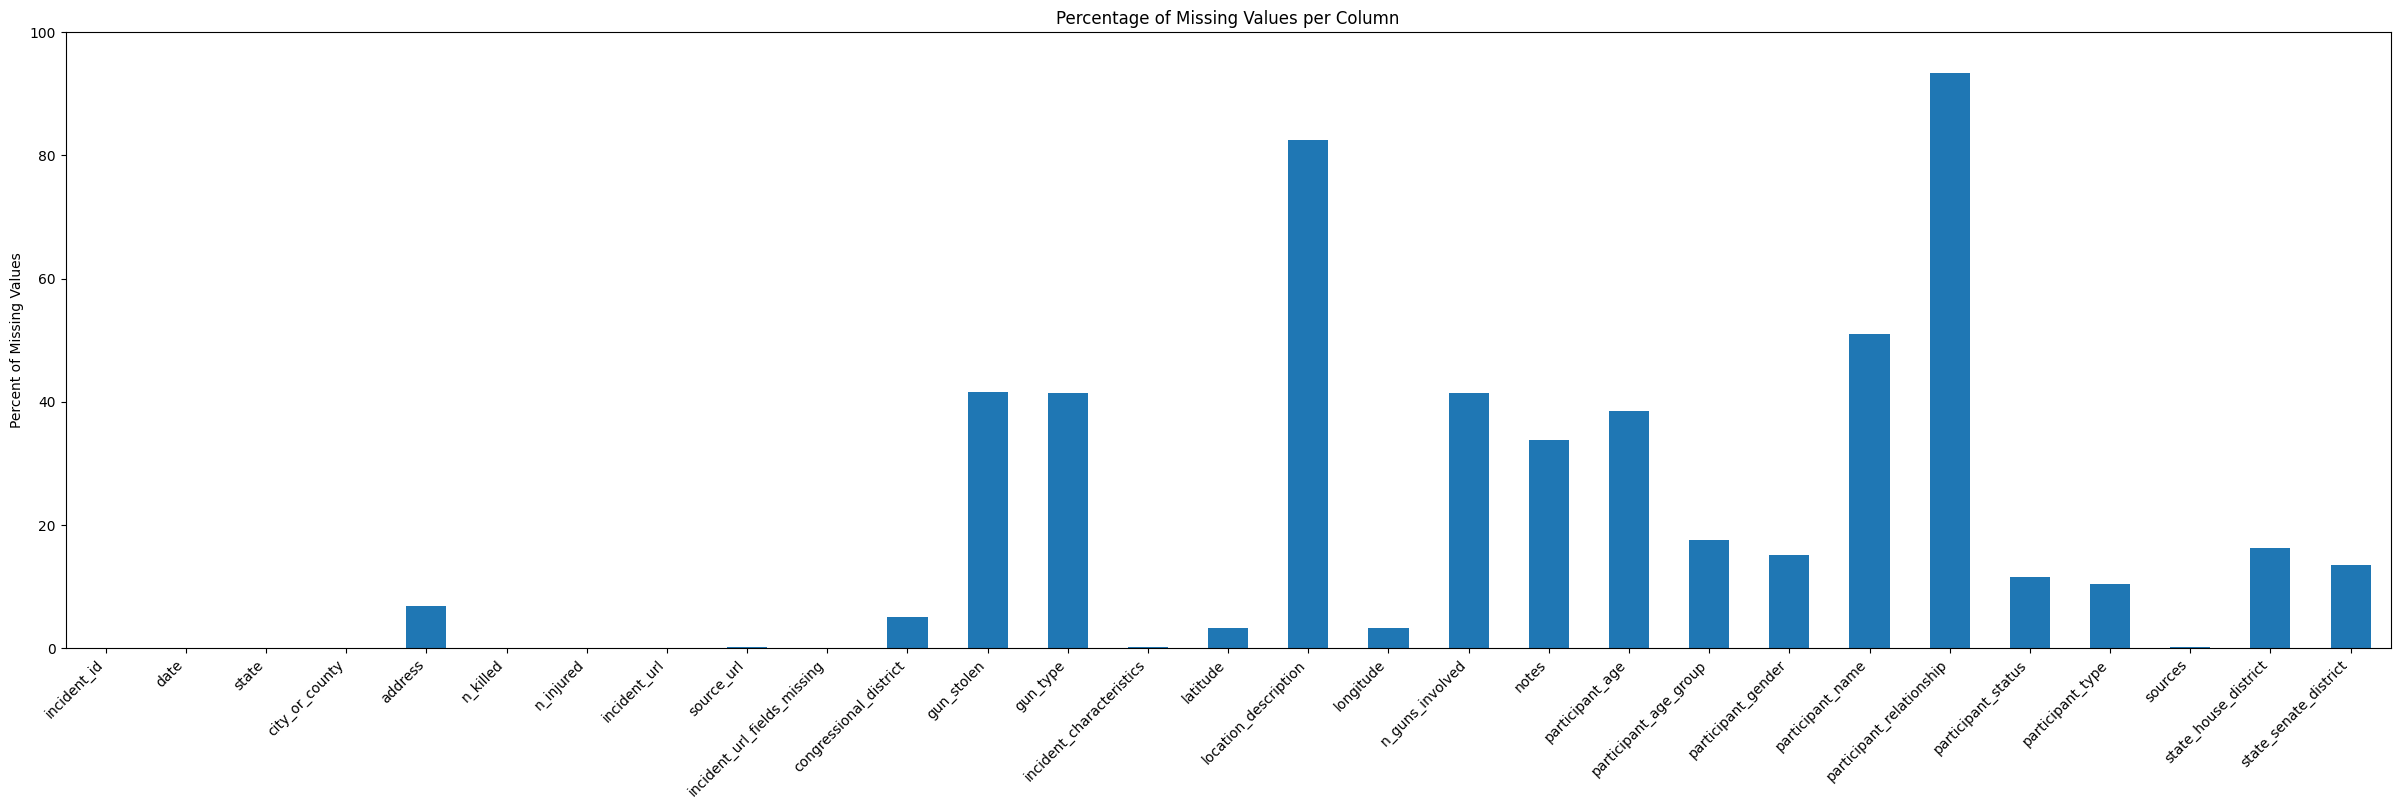

In [17]:
missing_values = df.isnull().sum() * 100 / len(df)
plt.figure(figsize=(30, 8))
missing_values.plot(kind='bar')
plt.title('Percentage of Missing Values per Column')
plt.ylabel('Percent of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)
plt.show()

## Outliers 

Despite there being more numerical values in the dataset, for many plotting outliers is pointless, as they are not ordinal variables, but rather represent specific categories, such as 'state_house_district' or 'state_senate_district'.<br>
Outliers in the plots below does not indicate lack of integrity in the data, as these columns describe actual events.

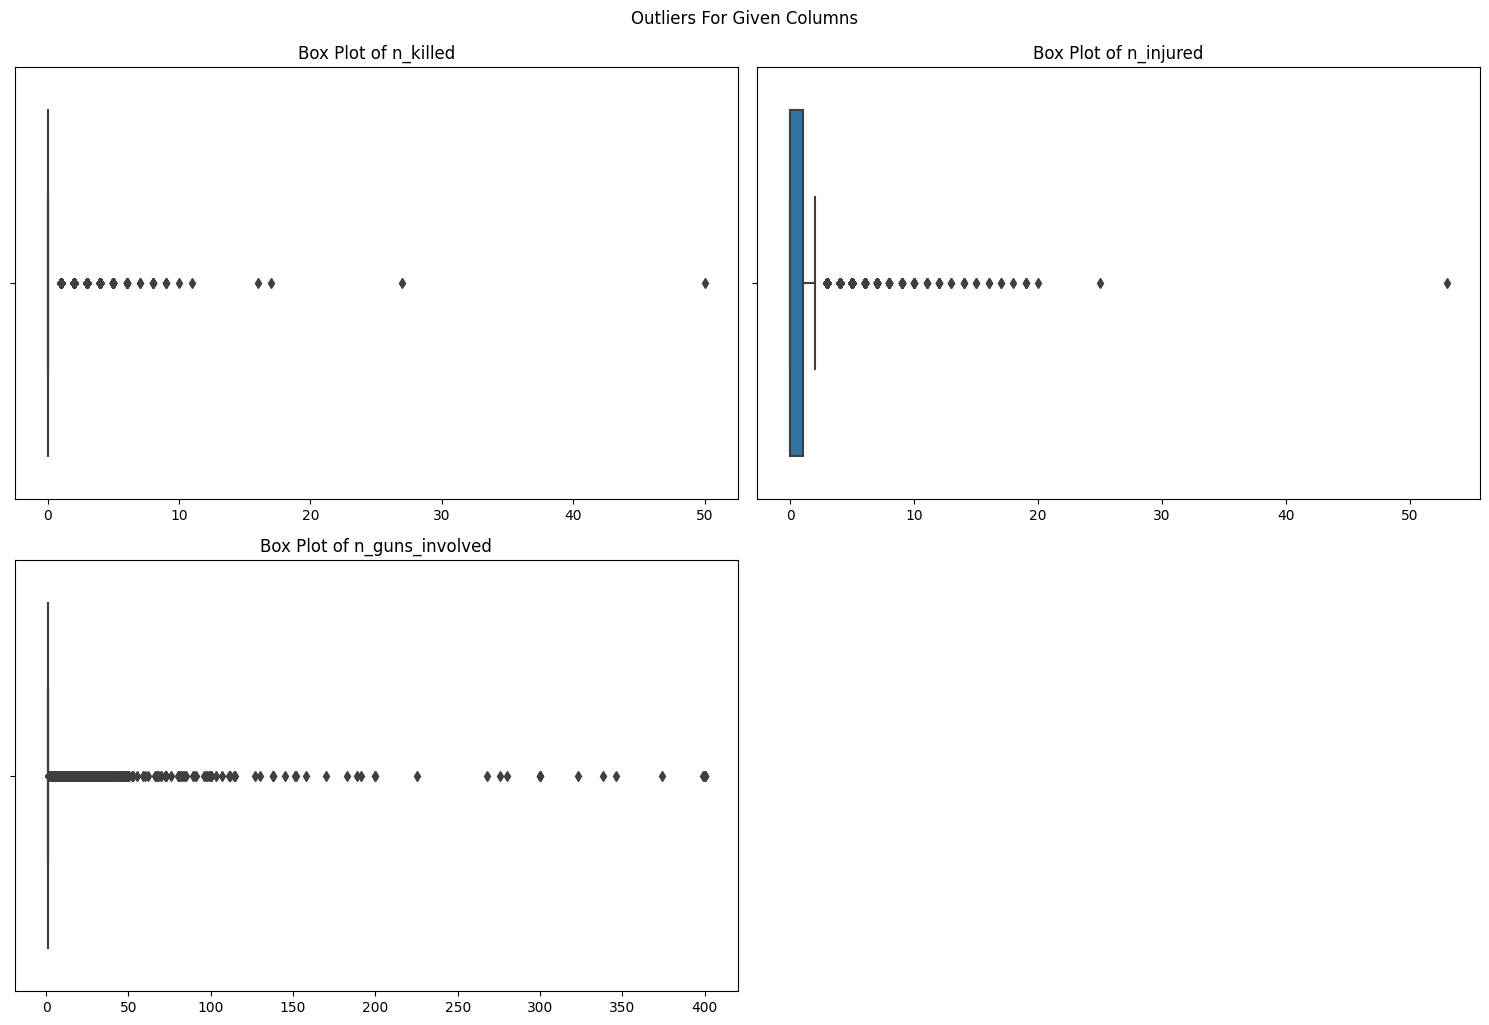

In [18]:
selected_columns = ['n_killed', 'n_injured', 'n_guns_involved']
numerical_columns = df[selected_columns]
plt.figure(figsize=(15, 10))
for i, col in enumerate(selected_columns, 1):
    plt.subplot(len(selected_columns) // 2 + 1, 2, i)
    sns.boxplot(data=df, x=col)
    plt.title(f'Box Plot of {col}')
    plt.xlabel('')
plt.tight_layout()
plt.suptitle('Outliers For Given Columns', y=1.02)
plt.show()

## Overall data integrity

The data set is indexed correctly, with all id numbers being unique. So are the values of 'incident_url' which describes the given incident.
<br>
The values of column 'source_url' are not unique, as it is possible that the same source (e.g. press company) report about two seperate incidents.
<br>
The values of column 'source' are not unique either. They are links to articles about the perpetrator, which suggests that there are many incidents committed by the same person.
<br>
It is not necessary to check for uniqueness of other columns as it is expected of them to contain duplicates.


In [19]:
columns_to_check_uniquness = ['incident_id', 'incident_url', 'source_url', 'sources']
for column in columns_to_check_uniquness:
    if df[column].dropna().nunique() == len(df[column].dropna()):
        print(f"All values in the column {column} are unique.")
    else:
        print(f"Column {column} contains duplicates.")

All values in the column incident_id are unique.
All values in the column incident_url are unique.
Column source_url contains duplicates.
Column sources contains duplicates.


As suspected in previous segment, there are in fact duplicates in the 'participant_name' column. This proves that, at least in this matter, the data is cohesive.

In [20]:
if df['participant_name'].dropna().nunique() == len(df['participant_name'].dropna()):
     print(f"All values in the column participant_name are unique.")
else:
     print(f"Column participant_name contains duplicates.")

Column participant_name contains duplicates.


It is worth checking whether all dates are formatted correctly and in the same way.
<br>
As proven by the code below, they all are in fact formatted in the same way (year-month-day).

In [21]:
def check_date_format(date_string, date_format):
    try:
        datetime.strptime(date_string, date_format)
        return True
    except ValueError:
        return False

desired_format = '%Y-%m-%d'

df['is_valid_date'] = df['date'].apply(lambda x: check_date_format(str(x), desired_format))

invalid_dates = df[~df['is_valid_date']]

if invalid_dates.empty:
    print("All dates are formatted correctly.")
else:
    print("The following dates are incorrectly formatted:")
    print(invalid_dates[['date']])

All dates are formatted correctly.


Overall the data integrity of the dataset is very high. Every incident is noted with a lot of detail, every person involved is taken into consideration and their information is easily available.

## Values of Unknown Meaning

Columns which values have no meaning for our analysis are:
- **incident_url**: URL of the incident report,
- **source_url**: URL of the source,
- **incident_url_fields_missing**: Boolean indicating if any fields are missing in the incident report.
<br>

As they lead to webpages which contains the same information that was loaded into the other columns of the dataset.

# Revision of validity of the goals

After analysing and getting more familiar with the dataset, we decided not to include the last goal (policy impact assessment) in further data mining. There are not enough information in the dataset to establish the goal easily. Adding missing information to dataset would be very complex and time consuming. We don’t believe that the outcome of establishing that goal would be valuable enough to take on the extra work and include it in further process.